# Supervised Learning with CNNs

Hopefully the idea of supervised learning in the last lecture seemed natural, especially given that you've known its simplest version, *linear regression*, for years.

Some data is more complicated, though, and requires using different neural network architectures. This might seem counter-intuitive, since networks of the type we've used so far (called deep neural network, or dense network, or fully-connected network, or multi-layer perceptron) are universal function approximators, meaning that they can approximate any function to arbitrary precision. But the problem is that the number of parameters in a dense network grows very quickly with the number of inputs, so even though there is a good NN in the class *in principle*, it might be very hard to find it in practice.



A convolutional neural network is a type of neural network that is designed to work well with images. To get the basic idea, consider the following image from [Data Science Applications to String Theory](https://www.sciencedirect.com/science/article/pii/S0370157319303072)
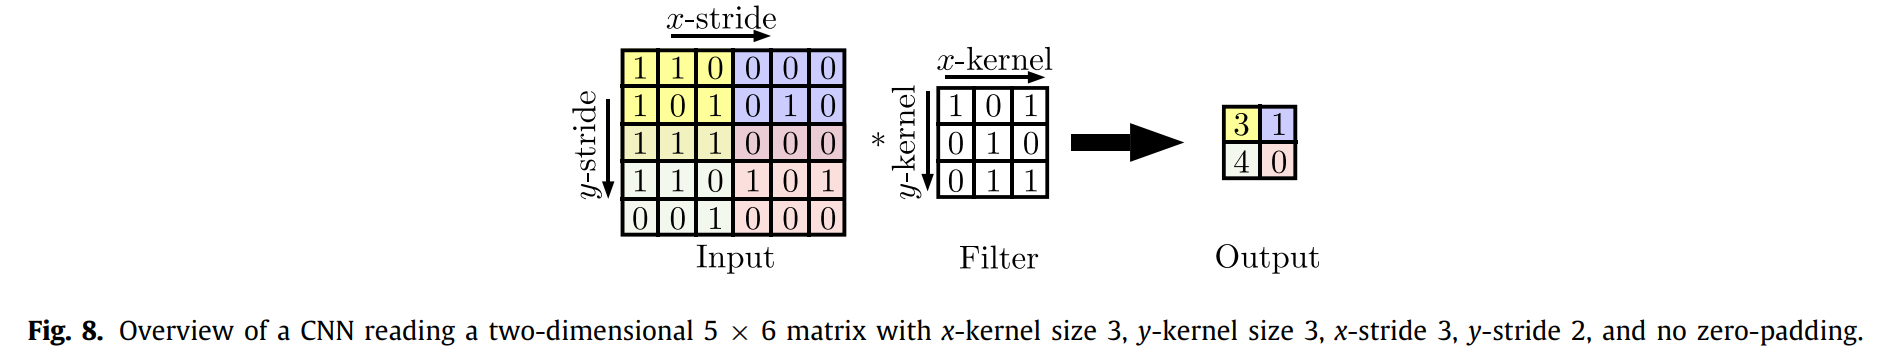
We would like to turn this into an equation in the context of a 2d convolution. There's a lot going on here, bear with me:
- **Input Tensor ($X$)**: The input data to the convolutional layer.
  - Dimensions: $(H_{\text{in}}, W_{\text{in}}, C_{\text{in}})$
  - Where $H_{\text{in}}$ is the height, $W_{\text{in}}$ is the width, and $C_{\text{in}}$ is the number of input channels.
- **Kernel/Filter ($W$)**: The weights of the convolutional layer used to perform the convolution.
  - Dimensions: $(k, k, C_{\text{in}}, C_{\text{out}})$
  - Where $k$ is the kernel size, $C_{\text{in}}$ is the number of input channels, and $C_{\text{out}}$ is the number of output channels.
- **Output Tensor ($Y$)**: The result of the convolution operation.
  - Dimensions: $(H_{\text{out}}, W_{\text{out}}, C_{\text{out}})$
  - Where $H_{\text{out}}$ is the height, $W_{\text{out}}$ is the width, and $C_{\text{out}}$ is the number of output channels.
- **Padding ($p$)**: The number of pixels added to the input data on all sides before performing the convolution.
- **Dilation ($d$)**: The spacing between kernel values. A dilation of 1 means there is no spacing, 2 means one pixel is skipped, and so on.
- **Kernel Size ($k$)**: The height and width of the convolution kernel. Common values are 3, 5, and 7.
- **Stride ($s$)**: The step size at which the kernel is applied to the input data. A stride of 1 means the kernel is applied to consecutive regions, 2 means every other region, and so on.
- **Equation**: The Conv2D operation can be described with the following equation:

  $$
  Y(i, j, c_{\text{out}}) = \sum_{c_{\text{in}}=0}^{C_{\text{in}}-1} \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} X\left( s \cdot i + m \cdot d - p, \ s \cdot j + n \cdot d - p, c_{\text{in}} \right) \cdot W(m, n, c_{\text{in}}, c_{\text{out}})
  $$

  Where:
  - $i = 0, 1, \dots, H_{\text{out}}-1$
  - $j = 0, 1, \dots, W_{\text{out}}-1$
  - $c_{\text{out}} = 0, 1, \dots, C_{\text{out}}-1$


In [1]:
import numpy as np

def conv2d(input_matrix, kernel, padding=0, stride=1):
    # Add padding to the input matrix
    input_padded = np.pad(input_matrix, ((padding, padding), (padding, padding)))
    
    # Dimensions of input and kernel
    H_in, W_in = input_padded.shape
    k, _ = kernel.shape
    
    # Calculate dimensions of output
    H_out = (H_in - k) // stride + 1
    W_out = (W_in - k) // stride + 1
    
    # Initialize output matrix
    output_matrix = np.zeros((H_out, W_out))
    
    # Perform convolution
    for i in range(H_out):
        for j in range(W_out):
            sub_matrix = input_padded[i*stride : i*stride+k, j*stride : j*stride+k]
            output_matrix[i, j] = np.sum(sub_matrix * kernel)
            
    return output_matrix

# Example input and kernel
input_matrix = np.array([[1, 0, 1],
                          [0, 1, 0],
                          [1, 0, 1]])

kernel = np.array([[1, -4],
                   [-2, 3]])

# Perform Convolution
output_matrix = conv2d(input_matrix, kernel)
print(output_matrix)

[[ 4. -6.]
 [-6.  4.]]


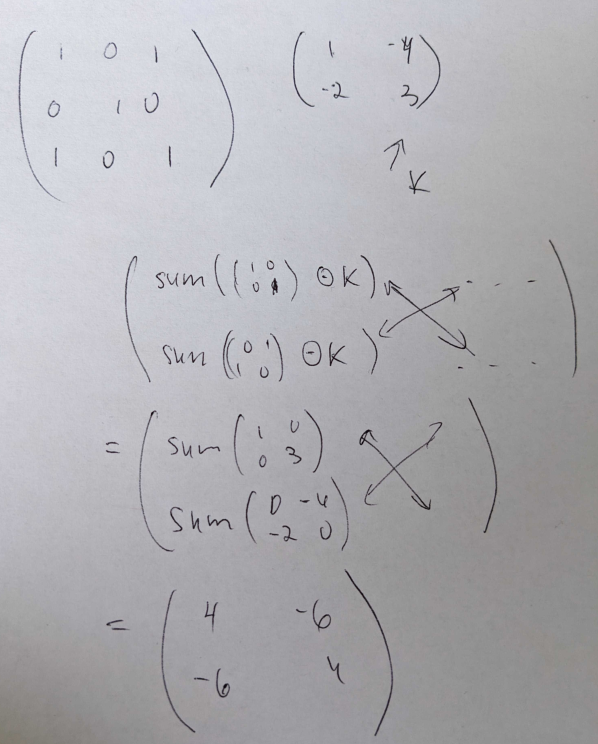

In [2]:
input_matrix = np.array([[1,1,0,0,0,0],[1,0,1,0,1,0],[1,1,1,0,0,0],[1,1,0,1,0,1],[0,0,1,0,0,0]])
kernel = np.array([[1,0,1],[0,1,0],[0,1,1]])

input_matrix.shape

(5, 6)

In [3]:
import numpy as np

def conv2d_multistride(input_matrix, kernel, padding=0, stridex=1, stridey=1):
    # Add padding to the input matrix
    input_padded = np.pad(input_matrix, ((padding, padding), (padding, padding)))
    
    # Dimensions of input and kernel
    H_in, W_in = input_padded.shape
    k, _ = kernel.shape
    
    # Calculate dimensions of output
    H_out = (H_in - k) // stridey + 1
    W_out = (W_in - k) // stridex + 1
    
    # Initialize output matrix
    output_matrix = np.zeros((H_out, W_out))
    
    # Perform convolution
    for i in range(H_out):
        for j in range(W_out):
            sub_matrix = input_padded[i*stridey : i*stridey+k, j*stridex : j*stridex+k]
            output_matrix[i, j] = np.sum(sub_matrix * kernel)
            
    return output_matrix

# Example input and kernel
input_matrix = np.array([[1, 0, 1],
                          [0, 1, 0],
                          [1, 0, 1]])

# Example from graphic above
input_matrix = np.array([[1,1,0,0,0,0],[1,0,1,0,1,0],[1,1,1,0,0,0],[1,1,0,1,0,1],[0,0,1,0,0,0]])
kernel = np.array([[1,0,1],[0,1,0],[0,1,1]])

output_matrix = conv2d_multistride(input_matrix, kernel, padding=0, stridex=3, stridey=2)
print(output_matrix)

[[3. 1.]
 [4. 0.]]


We'll need something else called max pooling. A maxpool2d layer is a layer that takes the maximum value of a region of the input data. It's similar to a convolutional layer, but instead of performing a linear operation, it performs a max operation.

In [4]:
import torch

test_pool = np.array([[3,2,0,0,0,0],[-1,0,6,0,10,0],[2,3,4,0,0,0],[4,3,0,2,0,1],[0,0,1,0,0,0]])
print(test_pool)

[[ 3  2  0  0  0  0]
 [-1  0  6  0 10  0]
 [ 2  3  4  0  0  0]
 [ 4  3  0  2  0  1]
 [ 0  0  1  0  0  0]]


Now let's see how maxpool works. Torch requires NCHW format, which means that the first dimension is the batch size, the second is the number of channels, and the last two are the height and width.

In [5]:
test_pool = torch.tensor(test_pool, dtype=torch.float32)
test_pool = test_pool.view(1,1,5,6) # convert to NCHW format
m = torch.nn.MaxPool2d(2, stride=2)
print(m(test_pool))

tensor([[[[ 3.,  6., 10.],
          [ 4.,  4.,  1.]]]])


This is what we would expect from a 2x2 kernel passing over the image starting from the upper left with stride 2.

# Galaxy Classification

We'll now classify galaxies according to spiral, elliptical, or unknown. The data is provided by the [Galaxy Zoo](https://data.galaxyzoo.org) project. See [this publication](http://adsabs.harvard.edu/abs/2008MNRAS.389.1179L) for more details. The pictures of the galaxies themselves are provided by the [Sloan Digital Sky Survey](https://www.sdss.org). 

I'll provide you with a zip file so that you can do this locally on your machine, too!

We'll begin with some initializations:

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from __future__ import print_function, division
import os
import scipy.ndimage
import torch
import random
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim


# different type of galaxies
classes = ['spiral', 'elliptical', 'uncertain']

# detect CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device", device)


def get_class(one_hot_vec):
    global classes
    for i in range(len(one_hot_vec)):
        if one_hot_vec[i] == 1:
            return classes[i]


Using device cpu


Now we'll read in array with information and perform a train : test split

In [7]:
hnd = open("./GalaxyZoo/training_data.txt","r")
all_data = eval(hnd.read())
random.shuffle(all_data)
hnd.close()

# look at a few images
counter = 0
for entry in all_data:
    break
    image = plt.imread(os.path.join('./GalaxyZoo/', entry[0] + '.jpg'))
    plt.figure()
    plt.title(get_class(entry[1:]))
    plt.imshow(image)
    plt.show()
    plt.imshow(scipy.ndimage.rotate(image, 90))
    plt.show()

    counter += 1
    if counter == 3:
        break

Let's normalize to have zero mean and unit variance

In [8]:
# here we assume that the images have uniformly distributed values between 0 and 1; this is probably not true, since there are many black pixels
# we could also compute the mean and variance for the test set we have, but here we just use this simplified assumption
mean = 0.5
std = 0.5
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean, mean, mean), (std, std, std))
])

untransform = transforms.Compose([
    transforms.Normalize((-mean / std, -mean / std, -mean / std), (1.0 / std, 1.0 / std, 1.0 / std)),
    transforms.ToPILImage()
])


over-/under-sample for a balanced training set and perform a train : test split of 90 : 10

In [9]:
max_num = 5000
max_num = min(max_num, len(all_data))
split_point = int(np.floor(0.9*max_num))

train_set, test_set = [], []
for i in range(max_num):
    name, galaxy_class = all_data[i][0], all_data[i][1:]
    image = plt.imread(os.path.join('./GalaxyZoo/', name + '.jpg'))
    # perform over-/ undersampling to create a balanced train set
    images = [image]
    if galaxy_class[0] == 1 and random.random() > 0.5:
        images += [scipy.ndimage.rotate(image, 180)]
    elif galaxy_class[1] == 1:
        images += [scipy.ndimage.rotate(image, 90), scipy.ndimage.rotate(image, 180), scipy.ndimage.rotate(image, 270)]
    elif galaxy_class[2] == 1 and random.random() > 0.7:
        continue

    if i <= split_point:
        for img in images:
            train_set.append([transform(np.array(img)).to(device), torch.tensor(galaxy_class).to(device)])
    else:
        for img in images:
            test_set.append([transform(img).to(device), torch.tensor(galaxy_class).to(device)])

print("(# train, # test): (" + str(len(train_set)) + ", " + str(len(test_set)) + ")\n")

# look at distribution of three classes in train set
distro = np.array([0 for _ in range(len(classes))])
for e in train_set:
    distro = np.add(distro, e[1].numpy())

for i in range(len(classes)):
    print("{:12s}: {:1.2f}".format(classes[i], distro[i]/float(len(train_set))))

/home/jim/anaconda3/envs/COMP/lib/python3.11/site-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


(# train, # test): (5785, 638)

spiral      : 0.35
elliptical  : 0.33
uncertain   : 0.33


Plot the first few

In [10]:
classes[train_set[0][1].argmax()]

'uncertain'

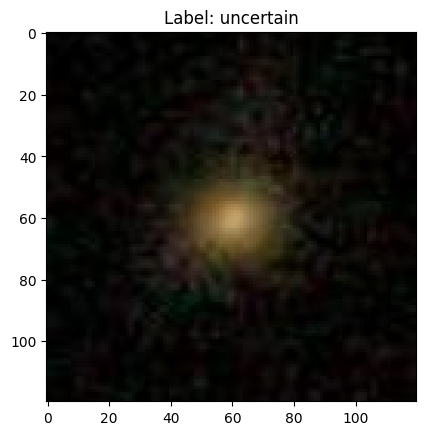

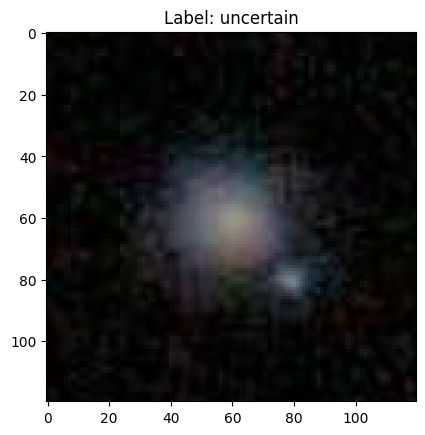

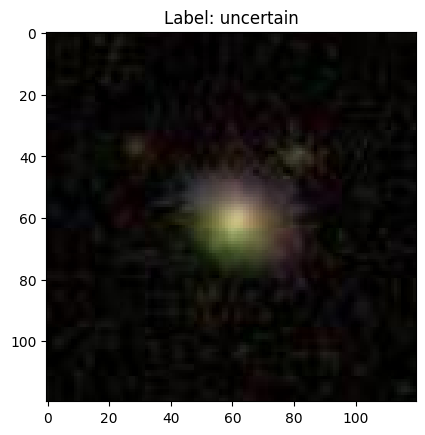

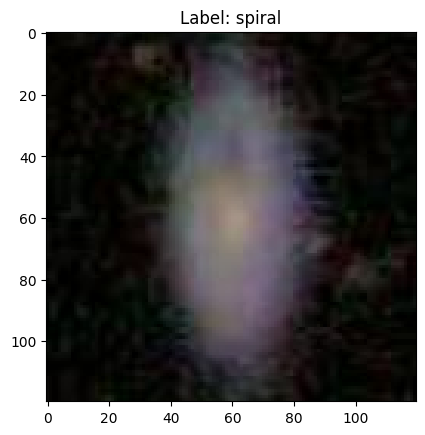

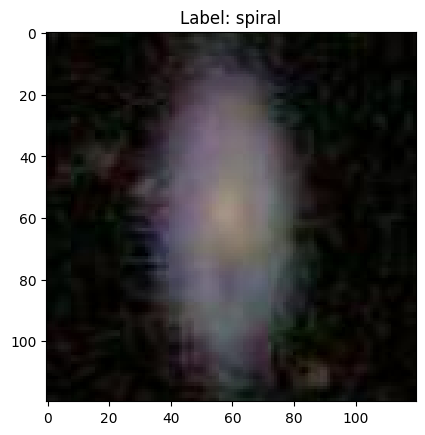

In [11]:
for ex in train_set[:5]:
    plt.figure()
    plt.title("Label: " + str(classes[ex[1].argmax()]))
    plt.imshow(untransform(ex[0]).convert("RGB"))
    plt.show()

Setup the neural network

In [12]:
x = train_set[0][0]
print(x.shape)

torch.Size([3, 120, 120])


In [13]:
x = x.view(1,3,120,120)

In [14]:
# helper function to compute the output dimension after a convolution
def get_conv_out_dim(size, padding, dilation, kernel, stride):
    return int(np.floor((size+2*padding-dilation*(kernel-1)-1)/stride + 1))


w0 = 120
w1 = get_conv_out_dim(w0, 0, 1, 8, 2)
w2 = get_conv_out_dim(w1, 0, 1, 2, 2)
w3 = get_conv_out_dim(w2, 0, 1, 8, 2)
w4 = get_conv_out_dim(w3, 0, 1, 2, 2)

class Classifyer_CNN(nn.Module):
    def __init__(self):
        super(Classifyer_CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 8, (2, 2))  # in_channels, out_channels, kernel_size, stride, padding, dilation, transposed, output_padding, groups, bias, padding_mode
        self.pool1 = nn.MaxPool2d(2, 2)  # kernel_size, stride=kernel_size, padding=0, dilation=1, return_indices=False, ceil_mode=False
        self.conv2 = nn.Conv2d(6, 16, 8, (2, 2))
        self.pool2 = nn.MaxPool2d(2, 2)
        self.act1 = nn.LeakyReLU()
        self.act2 = nn.LeakyReLU()
        self.act3 = nn.LeakyReLU()
        self.act4 = nn.LeakyReLU()
        self.fc1 = nn.Linear(16 * w4 * w4, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 3)

    def forward(self, x):
        x = self.act1(self.conv1(x))
        x = self.pool1(x)
        x = self.act2(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16 * w4 * w4)
        x = self.act3(self.fc1(x))
        x = self.act4(self.fc2(x))
        x = self.fc3(x)  # Don't take softmax, this is done automatically in the loss criterion
        return x


net = Classifyer_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net.to(device)

Classifyer_CNN(
  (conv1): Conv2d(3, 6, kernel_size=(8, 8), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(8, 8), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act1): LeakyReLU(negative_slope=0.01)
  (act2): LeakyReLU(negative_slope=0.01)
  (act3): LeakyReLU(negative_slope=0.01)
  (act4): LeakyReLU(negative_slope=0.01)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=3, bias=True)
)

Time to train!

##################################################################################
Epoch 0


Loss after  1000 mini-batches: 1.095041
Loss after  2000 mini-batches: 1.006484
Loss after  3000 mini-batches: 0.942027
Loss after  4000 mini-batches: 0.864853
Loss after  5000 mini-batches: 0.814858
spiral      : 0.5550
elliptical  : 0.9856
uncertain   : 0.3529
Total       : 399/638 = 0.6254


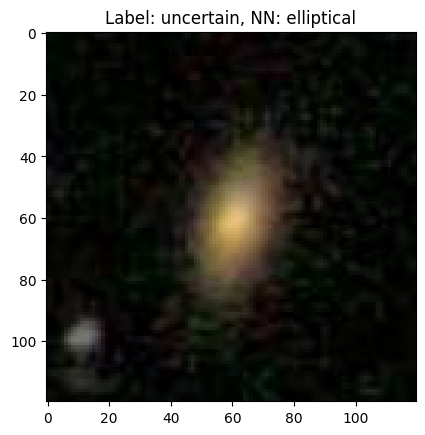

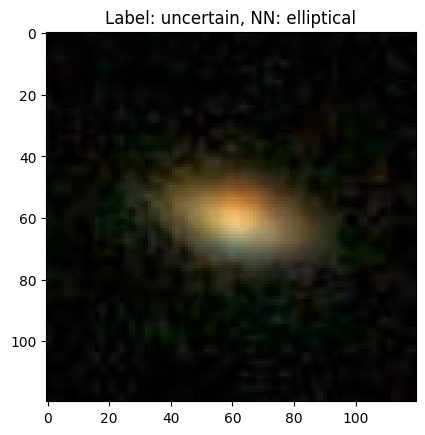

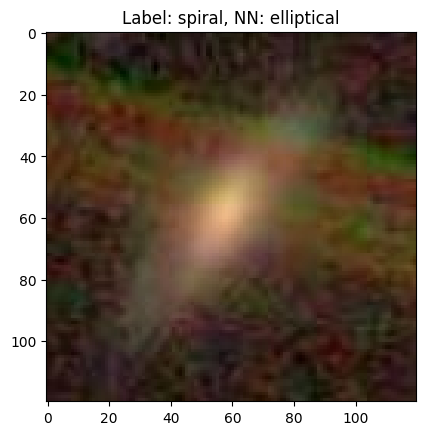

##################################################################################
Epoch 1
Loss after  1000 mini-batches: 0.721232
Loss after  2000 mini-batches: 0.707392
Loss after  3000 mini-batches: 0.673849
Loss after  4000 mini-batches: 0.725375
Loss after  5000 mini-batches: 0.704947
##################################################################################
Epoch 2
Loss after  1000 mini-batches: 0.638957
Loss after  2000 mini-batches: 0.657994
Loss after  3000 mini-batches: 0.623963
Loss after  4000 mini-batches: 0.598288
Loss after  5000 mini-batches: 0.630514
##################################################################################
Epoch 3
Loss after  1000 mini-batches: 0.619542
Loss after  2000 mini-batches: 0.605802
Loss after  3000 mini-batches: 0.561930
Loss after  4000 mini-batches: 0.602395
Loss after  5000 mini-batches: 0.584197
##################################################################################
Epoch 4
Loss after  1000 mini-batches: 0.574

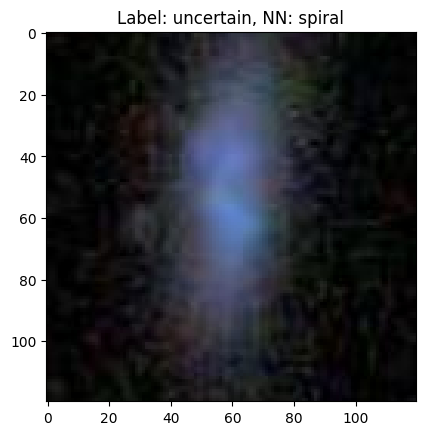

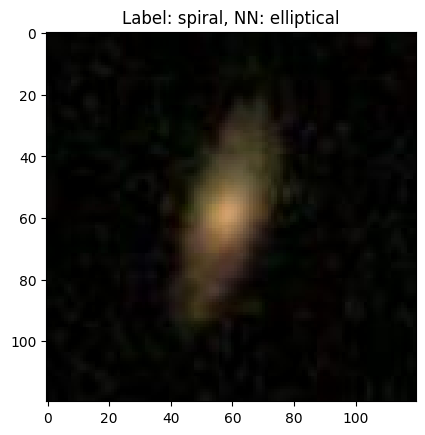

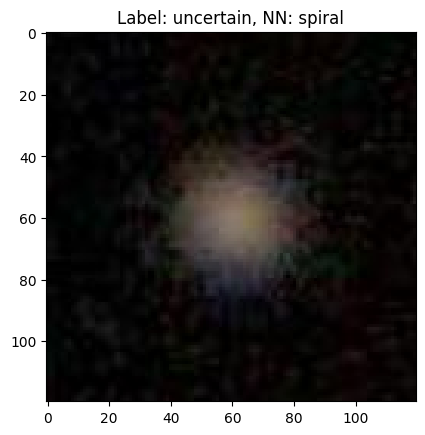

##################################################################################
Epoch 6
Loss after  1000 mini-batches: 0.531829
Loss after  2000 mini-batches: 0.556151
Loss after  3000 mini-batches: 0.523110
Loss after  4000 mini-batches: 0.550912
Loss after  5000 mini-batches: 0.535189
##################################################################################
Epoch 7
Loss after  1000 mini-batches: 0.499848
Loss after  2000 mini-batches: 0.524323
Loss after  3000 mini-batches: 0.510342
Loss after  4000 mini-batches: 0.550741
Loss after  5000 mini-batches: 0.525298
##################################################################################
Epoch 8
Loss after  1000 mini-batches: 0.519597
Loss after  2000 mini-batches: 0.499055
Loss after  3000 mini-batches: 0.511822
Loss after  4000 mini-batches: 0.502664
Loss after  5000 mini-batches: 0.501175
##################################################################################
Epoch 9
Loss after  1000 mini-batches: 0.481

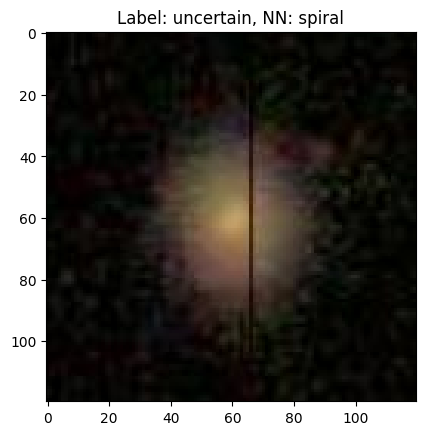

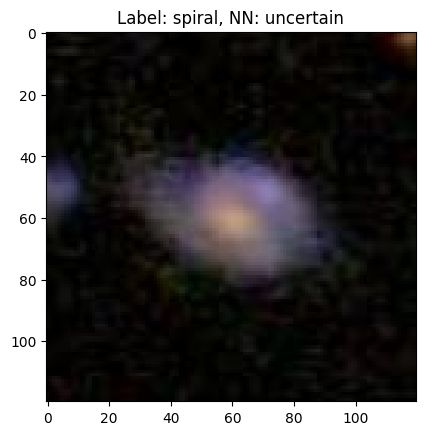

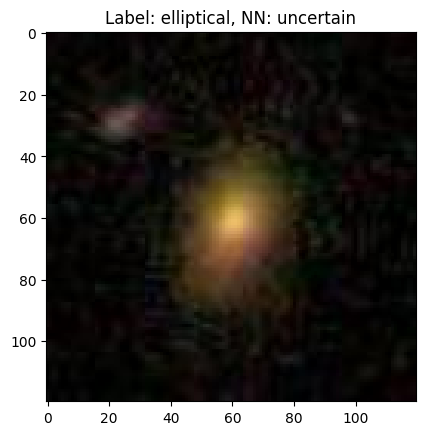

##################################################################################
Epoch 11
Loss after  1000 mini-batches: 0.457156
Loss after  2000 mini-batches: 0.435984
Loss after  3000 mini-batches: 0.513463
Loss after  4000 mini-batches: 0.482723
Loss after  5000 mini-batches: 0.465261
##################################################################################
Epoch 12
Loss after  1000 mini-batches: 0.432439
Loss after  2000 mini-batches: 0.461631
Loss after  3000 mini-batches: 0.465445
Loss after  4000 mini-batches: 0.464187
Loss after  5000 mini-batches: 0.451446
##################################################################################
Epoch 13
Loss after  1000 mini-batches: 0.487768
Loss after  2000 mini-batches: 0.454694
Loss after  3000 mini-batches: 0.423333
Loss after  4000 mini-batches: 0.454425
Loss after  5000 mini-batches: 0.437048
##################################################################################
Epoch 14
Loss after  1000 mini-batches: 0

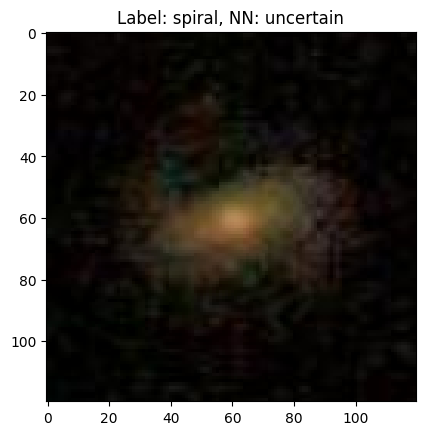

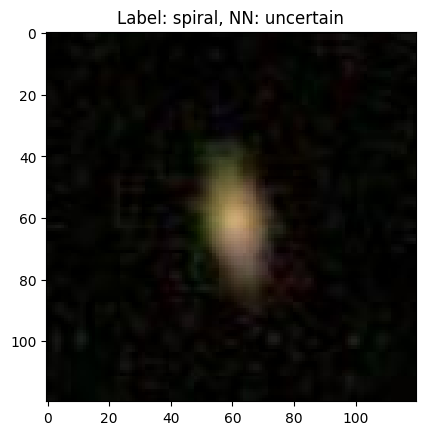

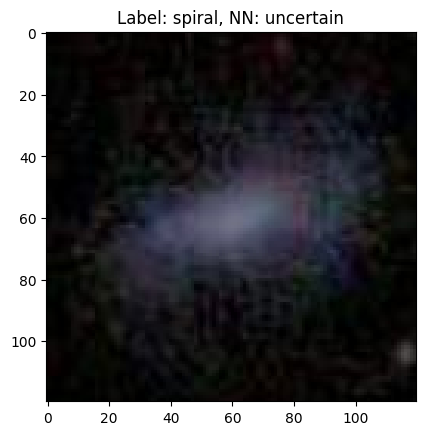

##################################################################################
Epoch 16
Loss after  1000 mini-batches: 0.429260
Loss after  2000 mini-batches: 0.410918
Loss after  3000 mini-batches: 0.444185
Loss after  4000 mini-batches: 0.456034
Loss after  5000 mini-batches: 0.415048
##################################################################################
Epoch 17
Loss after  1000 mini-batches: 0.415807
Loss after  2000 mini-batches: 0.427779
Loss after  3000 mini-batches: 0.451116
Loss after  4000 mini-batches: 0.441344
Loss after  5000 mini-batches: 0.415633
##################################################################################
Epoch 18
Loss after  1000 mini-batches: 0.395161
Loss after  2000 mini-batches: 0.461880
Loss after  3000 mini-batches: 0.463603
Loss after  4000 mini-batches: 0.407300
Loss after  5000 mini-batches: 0.397361
##################################################################################
Epoch 19
Loss after  1000 mini-batches: 0

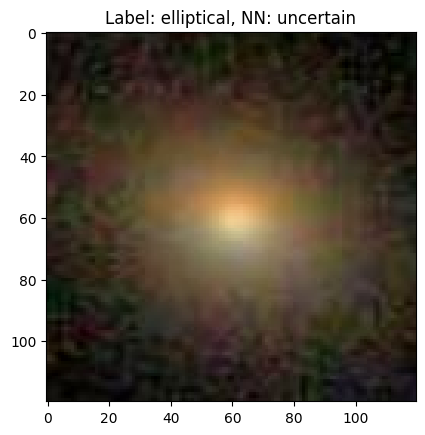

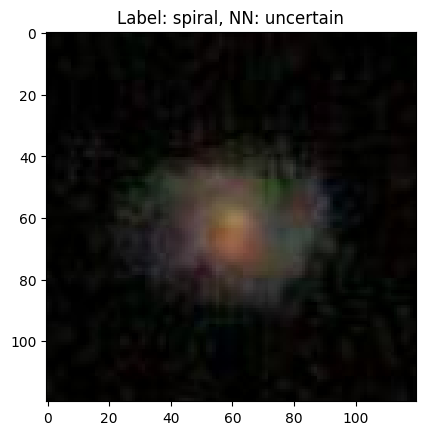

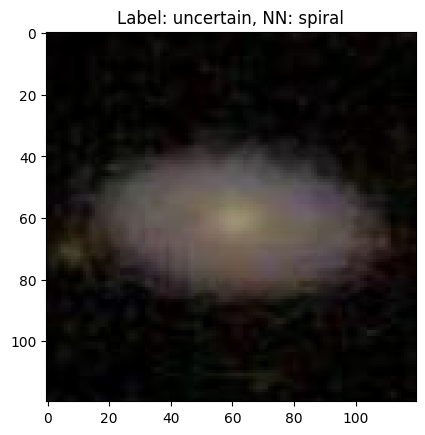

##################################################################################
Epoch 21
Loss after  1000 mini-batches: 0.379390
Loss after  2000 mini-batches: 0.389208
Loss after  3000 mini-batches: 0.396679
Loss after  4000 mini-batches: 0.384070
Loss after  5000 mini-batches: 0.414410
##################################################################################
Epoch 22
Loss after  1000 mini-batches: 0.359925
Loss after  2000 mini-batches: 0.454959
Loss after  3000 mini-batches: 0.397026
Loss after  4000 mini-batches: 0.403482
Loss after  5000 mini-batches: 0.398029
##################################################################################
Epoch 23
Loss after  1000 mini-batches: 0.397443
Loss after  2000 mini-batches: 0.416072
Loss after  3000 mini-batches: 0.377488
Loss after  4000 mini-batches: 0.392571
Loss after  5000 mini-batches: 0.431914
##################################################################################
Epoch 24
Loss after  1000 mini-batches: 0

In [15]:


########################################################################################################################
# (f) Train the NN and evaluate the performance
########################################################################################################################
trainloader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)
testloader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
num_epochs = 25
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    print("##################################################################################")
    print("Epoch", epoch)
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        # zero the parameter gradients, note we do this after each input (SGD)
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = net(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000
            print('Loss after {:5d} mini-batches: {:1.6f}'.format(i + 1, running_loss / 1000.))
            running_loss = 0.0

    if epoch % 5 == 0:
        with torch.no_grad():
            num_correct = [0, 0, 0]
            num_in_category = [0, 0, 0]
            incorrect_classified = []
            for _, data in enumerate(testloader, 0):
                inputs, labels = data
                labels = torch.max(labels, 1)[1]
                outputs = net(inputs)
                outputs = torch.max(outputs, 1)[1]
                num_in_category[labels] += 1
                if labels == outputs:
                    num_correct[outputs] += 1
                else:
                    incorrect_classified.append([inputs[0], classes[labels], classes[outputs]])

            for i in range(len(num_correct)):
                print("{:12s}: {:1.4f}".format(classes[i], float(num_correct[i])/float(num_in_category[i])))

            print("{:12s}: {:3d}/{:3d} = {:1.4f}".format("Total", len(test_set)-len(incorrect_classified), len(test_set), float(len(test_set)-len(incorrect_classified)) / float(len(test_set))))
            random.shuffle(incorrect_classified)
            for i in range(min(3, len(incorrect_classified))):
                plt.figure()
                plt.title("Label: " + incorrect_classified[i][1] + ", NN: " + incorrect_classified[i][2])
                plt.imshow(untransform(incorrect_classified[i][0]).convert("RGB"))
                plt.show()

print('Finished Training')